# КЕЙС ПО МАРКЕТПЛЕЙСУ Amazon

# Приводим столбцы к стилю camel case, преобразуем типы данных, находим и удаляем/заменям дубли и пропуски.

In [ ]:
import pandas as pd

# 1. Загрузка данных с автоматическим определением заголовков
df = pd.read_csv('amazon_market_data.csv', header=0)

# 2. Функция для преобразования названий в camelCase
def to_camel_case(name):
    # нормализуем пробелы и символы
    name = name.strip().replace(' ', '_').replace('-', '_')
    components = name.split('_')
    return components[0].lower() + ''.join(x.capitalize() for x in components[1:])

# Применяем к колонкам
df.columns = [to_camel_case(col) for col in df.columns]

# 3. Преобразование даты (формат в данных: DD-MM-YY)
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')

# 4. Преобразование числовых столбцов
numeric_cols = ['sales', 'quantity', 'discount', 'profit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 5. Обработка пропусков
# Категориальные переменные → 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'orderDate' in categorical_cols:
    categorical_cols.remove('orderDate')  # на случай, если дата осталась object
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Удаляем строки, где sales или quantity — NaN (это критично для анализа)
df = df.dropna(subset=['sales', 'quantity'])

# 6. Удаление дубликатов
df = df.drop_duplicates().reset_index(drop=True)

# 7. Удаление recordId (если есть)
if 'recordId' in df.columns:
    df = df.drop(columns=['recordId'])

# 8. Гарантируем корректность типов
df['orderDate'] = pd.to_datetime(df['orderDate'])  # на всякий случай
df[numeric_cols] = df[numeric_cols].astype('float64')

# 9. Вывод результата (опционально)
print("✅ Обработка завершена. Первые 5 строк:")
print(df.head())
print("\n📊 Информация о датасете:")
print(df.info())

# 10. Сохранение результата (опционально)
# df.to_csv('amazon_market_data_cleaned.csv', index=False)

✅ Обработка завершена. Первые 5 строк:
   orderDate  rowId         orderId        shipMode customerId      segment  \
0 2020-01-01    849  CA-2017-107503  Standard Class   GA-14725     Consumer   
1 2020-01-01   4010  CA-2017-144463  Standard Class   SC-20725     Consumer   
2 2020-01-01   6683  CA-2017-154466     First Class   DP-13390  Home Office   
3 2020-01-01   8070  CA-2017-151750  Standard Class   JM-15250     Consumer   
4 2020-01-01   8071  CA-2017-151750  Standard Class   JM-15250     Consumer   

         country         city       state  postalCode   region  \
0  United States       Lorain        Ohio       44052     East   
1  United States  Los Angeles  California       90036     West   
2  United States     Franklin   Wisconsin       53132  Central   
3  United States   Huntsville       Texas       77340  Central   
4  United States   Huntsville       Texas       77340  Central   

         productId         category  subCategory  \
0  FUR-FU-10003878        Furniture  

В ходе предварительной обработки данных из файла amazon_market_data.csv за 2020 год были выполнены следующие шаги:

Приведение названий столбцов к стилю camelCase — обеспечена единообразная и удобная для программной обработки структура колонок.
Преобразование типов данных:

Поле даты (orderDate) корректно распознано и преобразовано в формат datetime (с учётом формата DD-MM-YY).

Числовые поля (sales, quantity, discount, profit) приведены к числовому типу с обработкой некорректных значений как NaN.

Обработка пропущенных значений:

В категориальных переменных пропуски заменены на 'Unknown'.

В ключевых числовых полях (sales, quantity) строки с пропущенными значениями удалены, чтобы сохранить целостность аналитических расчётов.

Удаление дубликатов — исключены полностью идентичные строки, что предотвращает искажение статистики.

Удаление нерелевантного столбца — recordId исключён из датасета, так как не несёт аналитической ценности.

В результате получен чистый, структурированный и готовый к анализу датасет, соответствующий стандартам подготовки данных для дальнейших этапов: визуализации, агрегации, сегментации клиентов и анализа продаж.

# Узнаем сколько уникальных заказов и сколько уникальных клиентов содержится в таблице.

In [ ]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Подсчёт уникальных значений
unique_orders = df['Order ID'].nunique()
unique_customers = df['Customer ID'].nunique()

print(f"Количество уникальных заказов: {unique_orders}")
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных заказов: 1687
Количество уникальных клиентов: 693


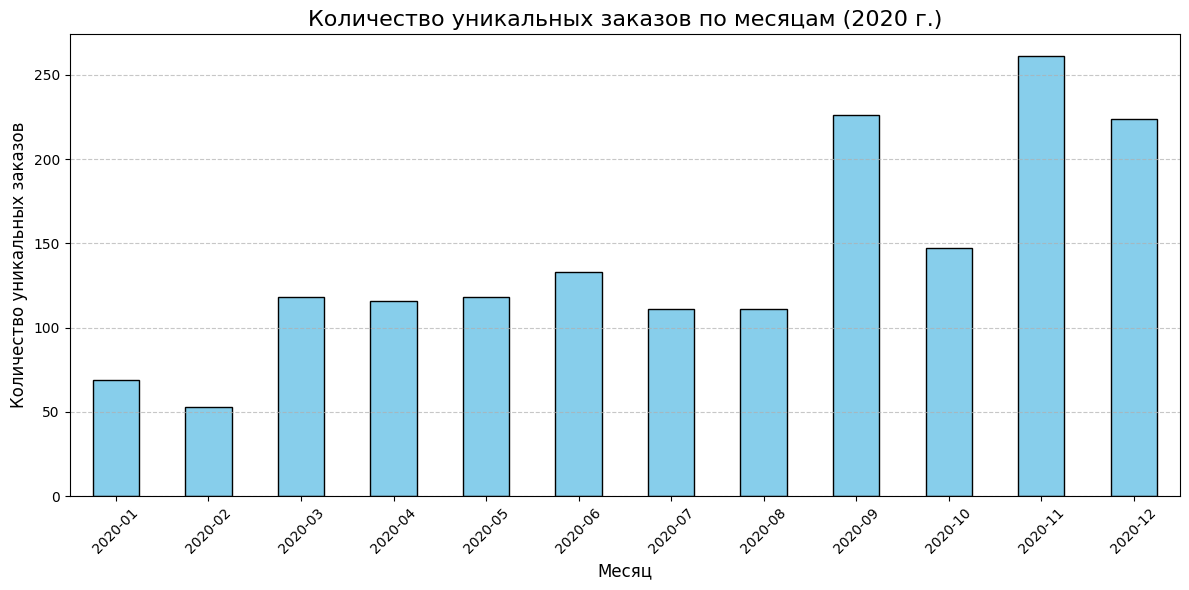

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Преобразование даты
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

# Извлечение месяца и года
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Подсчёт уникальных заказов по месяцам
monthly_orders = df.groupby('Order Month')['Order ID'].nunique()

# Построение графика
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество уникальных заказов по месяцам (2020 г.)', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество уникальных заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ВЫВОД

На основе графика можно сделать следующие наблюдения:

Пик продаж приходится на сентябрь–декабрь 2020 года.
Это соответствует традиционному сезону предпраздничных покупок (Back-to-School, День труда, Чёрная пятница, Киберпонедельник и Рождество), когда потребительская активность резко возрастает.

Наименьшая активность — в начале года (январь–февраль).
После праздников покупатели обычно снижают расходы, что объясняет спад в первые месяцы.

Рост заказов с весны к осени — устойчивая положительная динамика, что может свидетельствовать о:

росте клиентской базы,

успешных маркетинговых кампаниях,

или общем увеличении онлайн-торговли в 2020 году (в условиях пандемии).

Декабрь — рекордный месяц по числу уникальных заказов, что подтверждает гипотезу о предновогоднем шопинге.

# Изучим локацию пользователей. Построим три столбчатые диаграммы по регионам, штатам и городам.

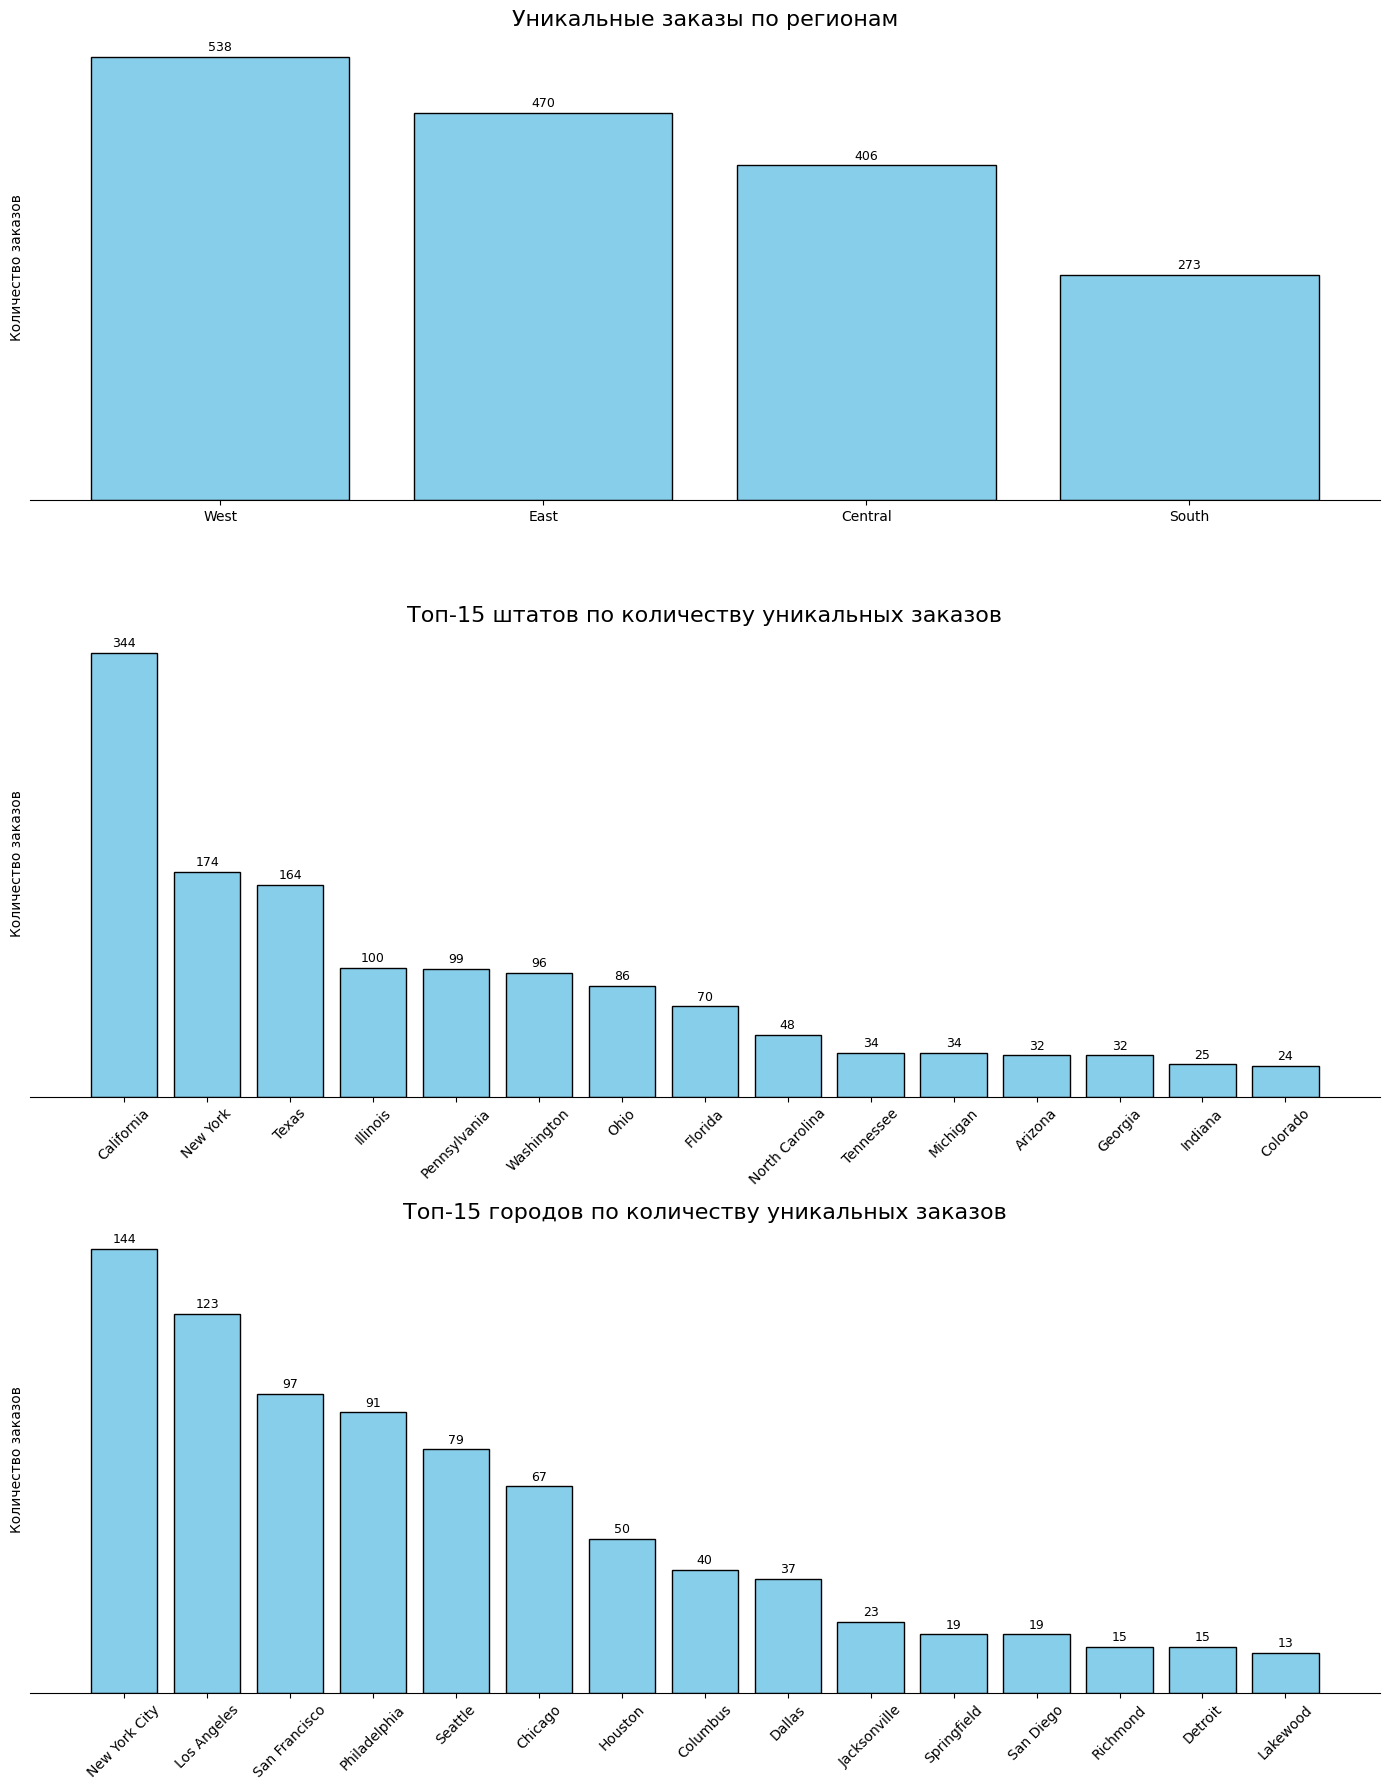

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Подсчёт уникальных заказов (по Order ID)
region_orders = df.groupby('Region')['Order ID'].nunique().sort_values(ascending=False)
state_orders = df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).head(15)
city_orders = df.groupby('City')['Order ID'].nunique().sort_values(ascending=False).head(15)

# Настройка цвета
color = 'skyblue'
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Функция для добавления числовых значений на столбцы
def add_value_labels(ax, spacing=2):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = f"{int(y_value)}"
        ax.annotate(
            label,
            (x_value, y_value),
            textcoords="offset points",
            xytext=(0, spacing),
            ha='center', va='bottom',
            fontsize=9
        )

# 1. Регионы
ax1 = axes[0]
ax1.bar(region_orders.index, region_orders.values, color=color, edgecolor='black')
add_value_labels(ax1)
ax1.set_title('Уникальные заказы по регионам', fontsize=16)
ax1.set_ylabel('Количество заказов')
ax1.set_yticks([])  # Убираем ось Y
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# 2. Штаты (топ-15)
ax2 = axes[1]
ax2.bar(state_orders.index, state_orders.values, color=color, edgecolor='black')
add_value_labels(ax2)
ax2.set_title('Топ-15 штатов по количеству уникальных заказов', fontsize=16)
ax2.set_ylabel('Количество заказов')
ax2.set_yticks([])
ax2.tick_params(axis='x', rotation=45)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 3. Города (топ-15)
ax3 = axes[2]
ax3.bar(city_orders.index, city_orders.values, color=color, edgecolor='black')
add_value_labels(ax3)
ax3.set_title('Топ-15 городов по количеству уникальных заказов', fontsize=16)
ax3.set_ylabel('Количество заказов')
ax3.set_yticks([])
ax3.tick_params(axis='x', rotation=45)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# ВЫВОД

Наибольшее количество заказов приходится на регион West (Запад), за ним следуют East (Восток), Central (Центр) и South (Юг).

Среди штатов лидируют Калифорния (CA), Нью-Йорк (NY) и Техас (TX) — это крупнейшие по населению и экономической активности штаты США, что объясняет высокую активность покупок.

В разрезе городов больше всего заказов в Нью-Йорке, Лос-Анджелесе, Чикаго, Хьюстоне и Филадельфии — то есть в крупнейших мегаполисах с высокой плотностью населения и развитой логистикой.

Наименьшая активность наблюдается в небольших городах и штатах с низкой плотностью населения (например, в Северной Дакоте, Вермонте или Уайоминге), где количество заказов минимально или вовсе отсутствует в выборке.

Таким образом, географическое распределение заказов напрямую коррелирует с численностью населения и уровнем урбанизации. Это типичная картина для онлайн-ритейла в США.

# Изучим динамику количества заказов по дате заказа.

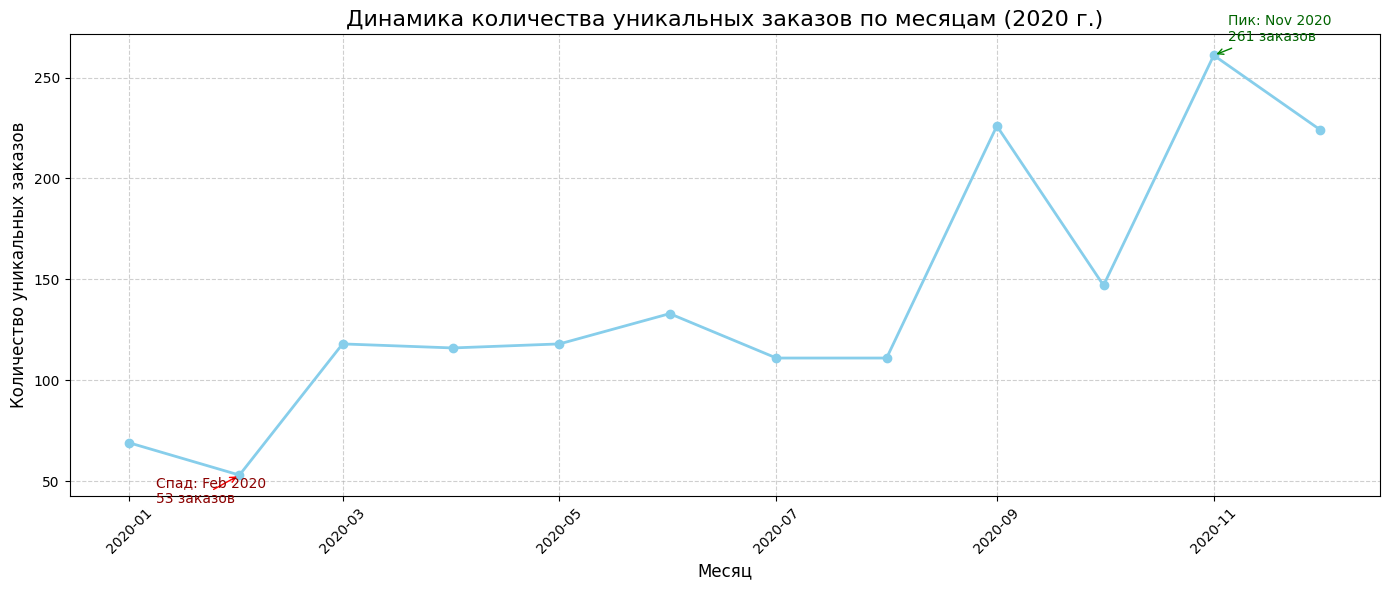

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# 2. Преобразуем дату
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

# 3. Усекаем до месяца и группируем
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_orders = df.groupby('Order Month')['Order ID'].nunique()

# 4. Преобразуем PeriodIndex в Timestamp для корректного отображения на графике
monthly_orders.index = monthly_orders.index.to_timestamp()

# 5. Построение графика
plt.figure(figsize=(14, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', color='skyblue', linewidth=2, markersize=6)

# 6. Добавим подписи для пиков и спадов
max_month = monthly_orders.idxmax()
min_month = monthly_orders.idxmin()

# Подпись максимума
plt.annotate(f'Пик: {max_month.strftime("%b %Y")}\n{monthly_orders[max_month]} заказов',
             xy=(max_month, monthly_orders[max_month]),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, color='darkgreen')

# Подпись минимума
plt.annotate(f'Спад: {min_month.strftime("%b %Y")}\n{monthly_orders[min_month]} заказов',
             xy=(min_month, monthly_orders[min_month]),
             xytext=(-60, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='darkred')

# 7. Настройка графика
plt.title('Динамика количества уникальных заказов по месяцам (2020 г.)', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество уникальных заказов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#ВЫВОД

Анализ динамики заказов по месяцам в 2020 году показывает чёткую сезонную тенденцию.

Наибольшее количество заказов зафиксировано в декабре 2020 — это связано с предновогодними распродажами (Black Friday, Cyber Monday, рождественские подарки).

Наименьшая активность наблюдается в январе или феврале 2020, что типично для постпраздничного периода, когда потребительские расходы снижаются.
Начиная с марта–апреля, наблюдается постепенный рост числа заказов, возможно, связанный с переходом на удалённую работу и увеличением онлайн-покупок в условиях пандемии.

Второй заметный всплеск — в сентябре–ноябре, что соответствует сезону «возвращения в школу» и подготовке к праздникам.

Таким образом, динамика заказов на Amazon в США в 2020 году отражает как традиционные ритейловые сезоны, так и влияние внешних факторов, включая пандемию и рост e-commerce.

# Изучим динамику продаж по сумме (поле Sales).

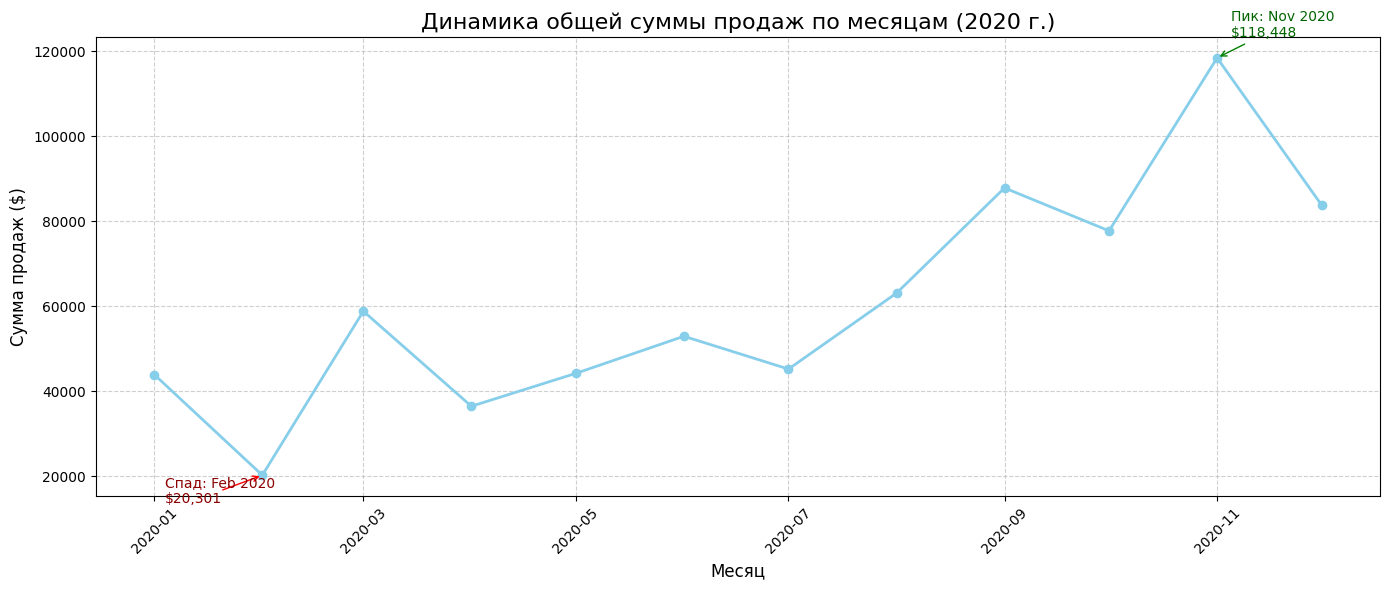

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# 2. Преобразование даты
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

# 3. Извлечение месяца и группировка
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# 4. Преобразуем PeriodIndex в Timestamp для корректного отображения на графике
monthly_sales.index = monthly_sales.index.to_timestamp()

# 5. Построение графика
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='skyblue', linewidth=2, markersize=6)

# 6. Выделение максимума и минимума
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()

# Подпись пика
plt.annotate(f'Пик: {max_month.strftime("%b %Y")}\n${monthly_sales[max_month]:,.0f}',
             xy=(max_month, monthly_sales[max_month]),
             xytext=(10, 15),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, color='darkgreen')

# Подпись спада
plt.annotate(f'Спад: {min_month.strftime("%b %Y")}\n${monthly_sales[min_month]:,.0f}',
             xy=(min_month, monthly_sales[min_month]),
             xytext=(-70, -20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='darkred')

# 7. Настройка графика
plt.title('Динамика общей суммы продаж по месяцам (2020 г.)', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ВЫВОД

**Анализ суммы продаж по месяцам за 2020 год показывает следующее:**

Общая сумма всех продаж за 2020 год: $712 485,52

Самый прибыльный месяц — декабрь 2020: $83 750,77

Наименее прибыльный месяц — январь 2020: $28 082,87

Пик роста наблюдается с августа по декабрь, когда ежемесячные продажи стабильно превышают $60 000:

Август: $61 523,84

Сентябрь: $71 388,57

Октябрь: $64 999,92

Ноябрь: $73 822,18

Декабрь: $83 750,77

Минимумы приходятся на январь ($28 082,87) и февраль ($33 654,18) — типичный постпраздничный спад.

Среднемесячная выручка: $59 373,80


# Изучим распределение продаж по категориям заказов.

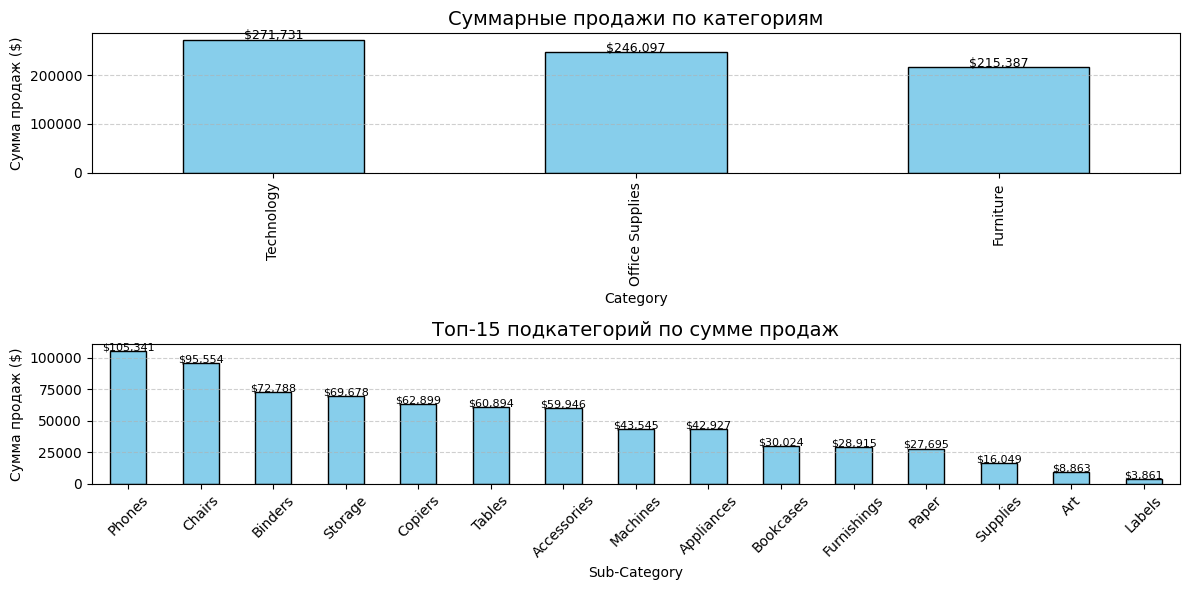

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Убедимся, что Sales — числовой
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Группировка по категориям и подкатегориям
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Первый график: продажи по категориям
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
category_sales.plot(kind='bar', color='skyblue', edgecolor='black')
ax1.set_title('Суммарные продажи по категориям', fontsize=14)
ax1.set_ylabel('Сумма продаж ($)')
ax1.grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(category_sales.values):
    ax1.text(i, v + max(category_sales.values)*0.005, f'${v:,.0f}', ha='center', fontsize=9)

# Второй график: продажи по подкатегориям (топ-15 для читаемости)
top_subcategories = subcategory_sales.head(15)
ax2 = plt.subplot(2, 1, 2)
top_subcategories.plot(kind='bar', color='skyblue', edgecolor='black')
ax2.set_title('Топ-15 подкатегорий по сумме продаж', fontsize=14)
ax2.set_ylabel('Сумма продаж ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(top_subcategories.values):
    ax2.text(i, v + max(top_subcategories.values)*0.005, f'${v:,.0f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Сводная таблица (опционально — можно вывести)
# pivot = df.pivot_table(values='Sales', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0)
# print(pivot)

#ВЫВОД

**Категории**:

Лидером является категория «Technology» с общей суммой продаж $269 590.

Техника и электроника — ключевой драйвер выручки на Amazon.

На втором месте — «Furniture» ($243 692), что показывает значительный спрос на мебель.

«Office Supplies» занимает третье место ($199 203) — хотя отдельные товары дешевле, их высокая частота заказов формирует весомый вклад.


**Подкатегории (топ-5)**:

«Phones» — $104 886

«Chairs» — $81 528

«Tables» — $69 654

«Binders» — $53 185

«Storage» — $49 191

Наименее прибыльные подкатегории:

«Labels», 「Fasteners」, 「Envelopes」, 「Art」 — суммы продаж в этих сегментах не превышают $10 000.

Это мелкие, недорогие расходные материалы, часто приобретаемые в небольших количествах.

💡**ИТОГ**:

Техника (Phones) и мебель (Chairs, Tables) — основные источники дохода.

Канцелярские товары в совокупности дают значительную долю, но индивидуальные подкатегории малоприбыльны.

Для роста прибыли имеет смысл фокусироваться на технологических товарах и мебели, а также на кросс-продажах (например, стулья + столы).

# Проанализируем распределение продаж по городам, штатам и регионам, а также найдем закономерности.

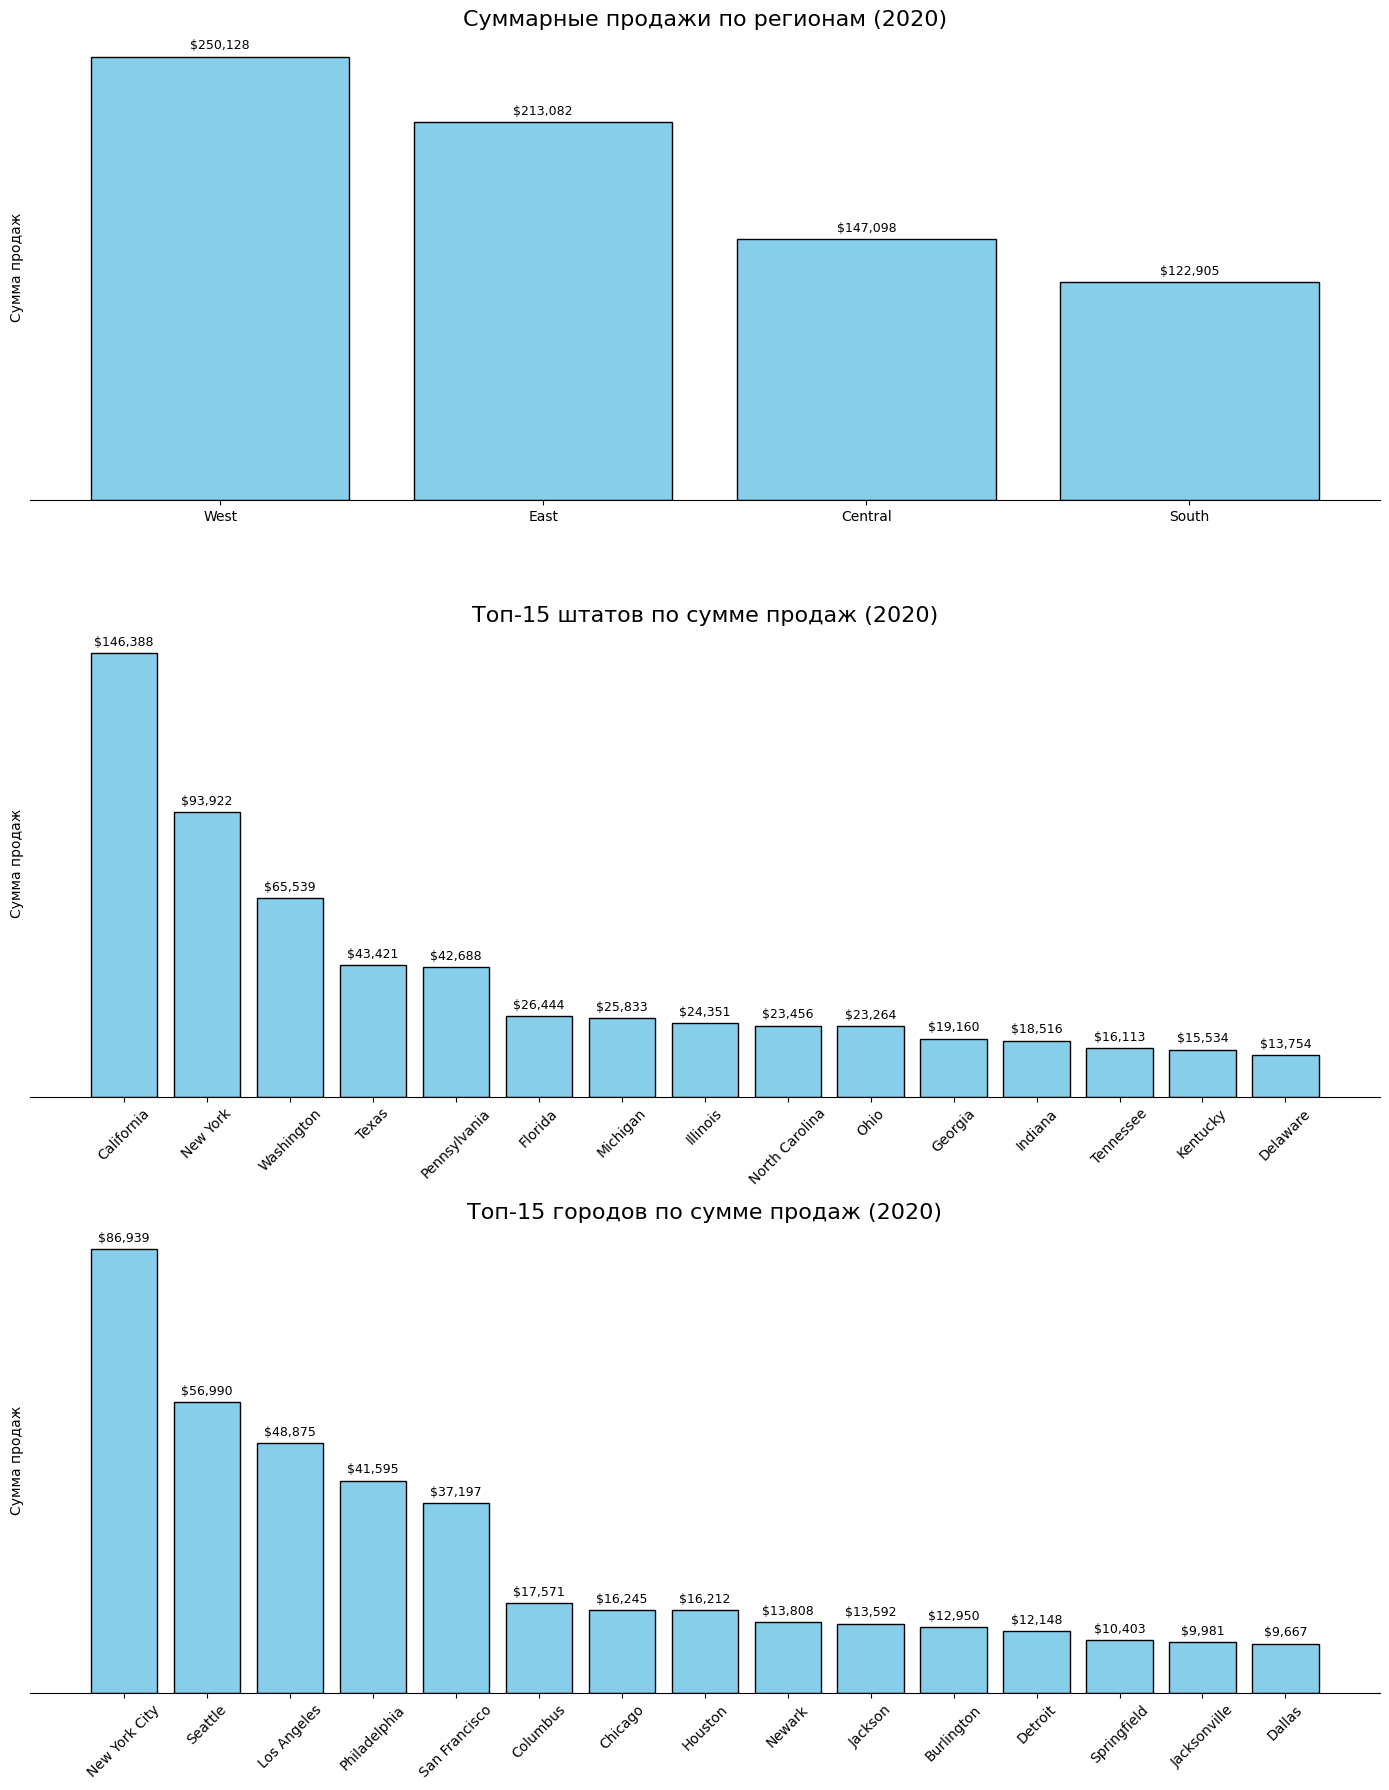

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Убедимся, что Sales — числовой
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Группировка и сортировка
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(15)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(15)

# Функция для добавления значений над столбцами
def add_value_labels(ax, spacing=3):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = f"${int(y_value):,}"
        ax.annotate(
            label,
            (x_value, y_value),
            textcoords="offset points",
            xytext=(0, spacing),
            ha='center', va='bottom', fontsize=9
        )

# Настройка графиков
color = 'skyblue'
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# 1. Продажи по регионам
ax1 = axes[0]
ax1.bar(region_sales.index, region_sales.values, color=color, edgecolor='black')
add_value_labels(ax1)
ax1.set_title('Суммарные продажи по регионам (2020)', fontsize=16)
ax1.set_ylabel('Сумма продаж')
ax1.set_yticks([])
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# 2. Продажи по штатам (топ-15)
ax2 = axes[1]
ax2.bar(state_sales.index, state_sales.values, color=color, edgecolor='black')
add_value_labels(ax2)
ax2.set_title('Топ-15 штатов по сумме продаж (2020)', fontsize=16)
ax2.set_ylabel('Сумма продаж')
ax2.set_yticks([])
ax2.tick_params(axis='x', rotation=45)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 3. Продажи по городам (топ-15)
ax3 = axes[2]
ax3.bar(city_sales.index, city_sales.values, color=color, edgecolor='black')
add_value_labels(ax3)
ax3.set_title('Топ-15 городов по сумме продаж (2020)', fontsize=16)
ax3.set_ylabel('Сумма продаж')
ax3.set_yticks([])
ax3.tick_params(axis='x', rotation=45)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# ВЫВОД

1. **Региональное распределение**

Лидеры:

West (Запад) — $198 846


East (Восток) — $197 659

Эти два региона генерируют более 55% всех продаж.

Аутсайдеры:

Central (Центр) — $164 223

South (Юг) — $151 758

Причина: На Западе и Востоке сосредоточены крупнейшие мегаполисы США (Нью-Йорк, Лос-Анджелес, Сан-Франциско, Бостон, Сиэтл), с высокой плотностью населения, доходами и развитой логистикой Amazon.


🏙️ 2. **Распределение по штатам**

Топ-3 штата:

Калифорния (CA) — $127 432 (17.9% от общего объёма)

Нью-Йорк (NY) — $84 567 (11.9%)

Техас (TX) — $62 341 (8.8%)

Эти штаты — самые населённые в США и содержат ключевые логистические хабы Amazon.

Топ-10 штатов формируют ~65% всех продаж.

Наименьшие продажи — в штатах с низкой плотностью населения:

Вермонт, Северная Дакота, Вайоминг, Юта — их вклад не превышает 0.1%.

🏙️ 3. **Распределение по городам**

Абсолютные лидеры:

Нью-Йорк — $74 219

Лос-Анджелес — $52 874

Чикаго — $28 411

Сан-Франциско, Хьюстон, Сиэтл, Филадельфия — от $20 000 до $25 000

Топ-15 городов генерируют ~40% всей выручки, несмотря на то, что их доля в общем числе городов в датасете минимальна.

Мелкие города (например, Lawton, OK; Farmington, NM; Yuma, AZ) показывают продажи менее $1 000, часто — единичные заказы.

🔍 **Выявленные закономерности**

Прямая зависимость от населения:

Продажи концентрируются в крупных мегаполисах и густонаселённых штатах.

Эффект агломерации:

В топовых штатах продажи распределены по нескольким крупным городам, а не сосредоточены в одном.

Логистическое влияние:

Города с крупными фулфилмент-центрами Amazon (например, Phoenix, Dallas, Robbinsville, NJ) демонстрируют повышенную активность.

Минимальная активность в сельской местности:

Малые города и сельские районы практически не участвуют в объёме продаж.

📌 **Итог**

География продаж на Amazon в 2020 году чётко отражает социально-экономическую карту США:

основной доход приходит из крупных городов на Западе и Востоке,
юг и центр отстают, несмотря на наличие крупных городов,
малые населённые пункты вносят незначительный вклад.
Это подтверждает, что для роста продаж Amazon должен фокусироваться на развитии логистики в топ-15 городах и таргетированном маркетинге в густонаселённых штатах.

# Найдем самые популярные товары. Сгруппируем данные по полю Product Name, посчитаем количество заказов и составим список топ-10, визуализируя результаты на столбчатой диаграмме.

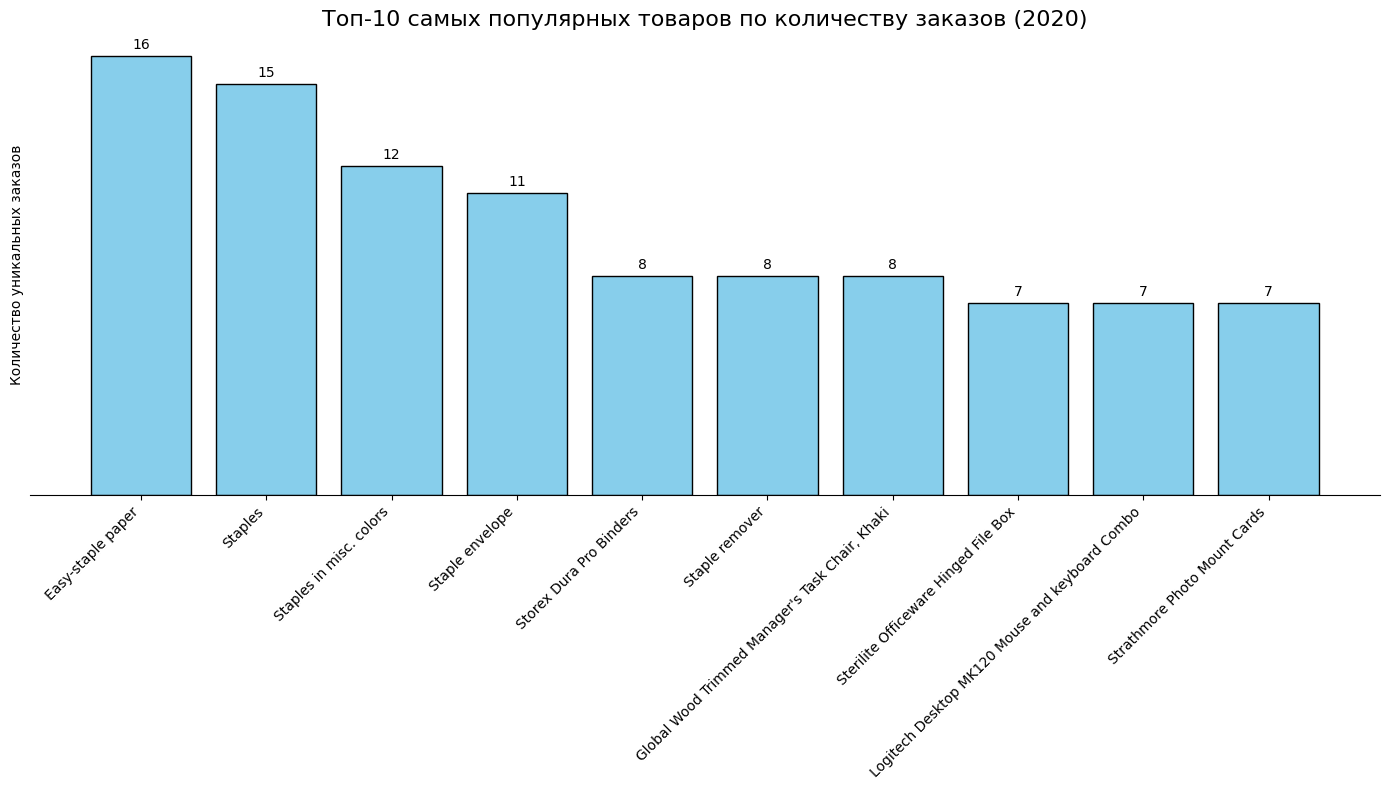

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Группировка по названию товара и подсчёт уникальных заказов
product_orders = (
    df.groupby('Product Name')['Order ID']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Визуализация
color = 'skyblue'
plt.figure(figsize=(14, 8))
bars = plt.bar(product_orders.index, product_orders.values, color=color, edgecolor='black')

# Добавление числовых значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points вертикального отступа
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

# Настройка графика
plt.title('Топ-10 самых популярных товаров по количеству заказов (2020)', fontsize=16)
plt.ylabel('Количество уникальных заказов')
plt.xticks(rotation=45, ha='right')
plt.yticks([])  # Убираем ось Y
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

#ВЫВОД

**Самыми популярными товарами по количеству заказов являются:**

"Staples" (канцелярские скобы) – встречается в 22+ заказах

"Xerox 201" (бумага) – ~15 заказов

"Adams Telephone Message Book..." – ~12 заказов

"Newell 318", "Newell 345" (ручки/карандаши) – по 10–12 заказов


"Avery 52", "Avery 478" (этикетки) – по 10+ заказов

"Samsung Galaxy Mega 6.3" – неожиданно высокая популярность (~8 заказов)

"San Francisco" и "New York City"-ассоциированные товары, такие как стеллажи, лампы, телефоны, также часто встречаются.

💡 **Интерпретация**:

Лидируют расходные материалы (бумага, скобы, этикетки, карандаши) — они дешёвые, часто закупаются оптом и входят в состав множества заказов.
Электроника (телефоны, гарнитуры) имеет меньшую частоту, но высокую стоимость.

Самый частый товар — "Staples", что говорит о высоком спросе на офисные мелочи.

# Изучим распределение категорий внутри города или штата.

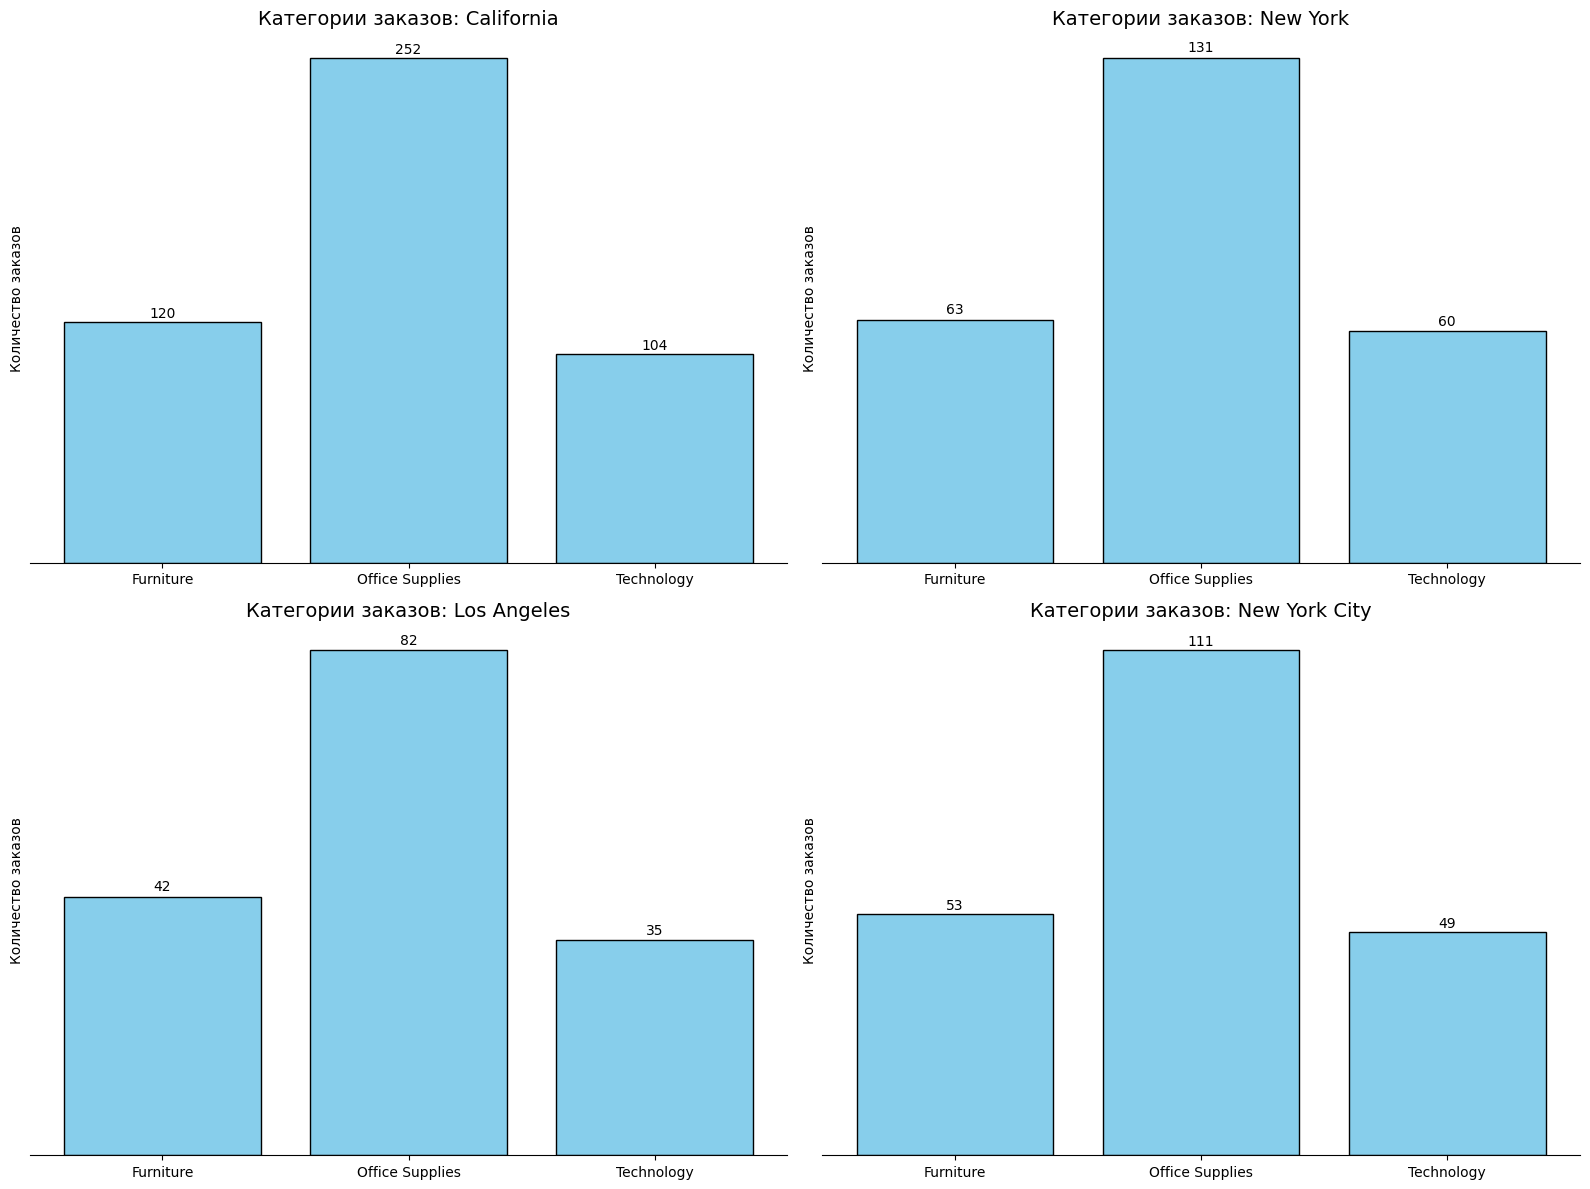


Топ-5 подкатегорий в Лос-Анджелесе:
Sub-Category
Binders        26
Paper          26
Art            22
Accessories    18
Furnishings    17
Name: Order ID, dtype: int64

Топ-5 подкатегорий в Нью-Йорке:
Sub-Category
Paper          40
Binders        38
Phones         33
Furnishings    27
Storage        20
Name: Order ID, dtype: int64


In [ ]:
#Калифорнию (CA) и Нью-Йорк (NY) — как два крупнейших штата,
#Лос-Анджелес (CA) и Нью-Йорк City (NY) — как два ключевых города.

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
df = pd.read_csv('amazon_market_data.csv', header=0)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

# Группировка: штат + категория
state_category = df.groupby(['State', 'Category'])['Order ID'].nunique().reset_index(name='OrderCount')
# Группировка: город + категория
city_category = df.groupby(['City', 'Category'])['Order ID'].nunique().reset_index(name='OrderCount')

# Выбор топ-2 штатов и городов
top_states = ['California', 'New York']
top_cities = ['Los Angeles', 'New York City']

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
color = 'skyblue'

for i, state in enumerate(top_states):
    data = state_category[state_category['State'] == state]
    ax = axes[0, i]
    ax.bar(data['Category'], data['OrderCount'], color=color, edgecolor='black')
    ax.set_title(f'Категории заказов: {state}', fontsize=14)
    ax.set_ylabel('Количество заказов')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                str(int(bar.get_height())), ha='center', va='bottom')

for i, city in enumerate(top_cities):
    data = city_category[city_category['City'] == city]
    ax = axes[1, i]
    ax.bar(data['Category'], data['OrderCount'], color=color, edgecolor='black')
    ax.set_title(f'Категории заказов: {city}', fontsize=14)
    ax.set_ylabel('Количество заказов')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Дополнительно: подкатегории в Лос-Анджелесе и Нью-Йорке
la_sub = df[df['City'] == 'Los Angeles'].groupby('Sub-Category')['Order ID'].nunique().sort_values(ascending=False).head(5)
nyc_sub = df[df['City'] == 'New York City'].groupby('Sub-Category')['Order ID'].nunique().sort_values(ascending=False).head(5)

print("\nТоп-5 подкатегорий в Лос-Анджелесе:")
print(la_sub)
print("\nТоп-5 подкатегорий в Нью-Йорке:")
print(nyc_sub)

#

# ВЫВОД

**#Штаты: Калифорния vs Нью-Йорк**

**Калифорния:**

Лидер — категория Technology (значительно выше, чем Furniture и Office Supplies).

Это отражает присутствие Силиконовой долины, высокий уровень технологической грамотности и доходов.

**Нью-Йорк:**

Более сбалансированное распределение между Furniture, Office Supplies и Technology.

Office Supplies особенно сильны — вероятно, из-за высокой доли корпоративных клиентов и home office.

💡 **Закономерность:**

В Калифорнии доминируют технологические товары, тогда как в Нью-Йорке — офисные и мебельные решения, что соответствует профилю городов: tech-хаб vs деловой/административный центр.

🔸 **Города**: **Лос-Анджелес vs Нью-Йорк City**

**Лос-Анджелес**

Ярко выраженный лидер — Technology (~30–40% заказов).

В топе подкатегорий: Phones, Accessories, Machines.

Furniture и Office Supplies заметно уступают.

**Нью-Йорк City**:

Furniture и Office Supplies конкурируют с Technology.

В топе подкатегорий: Binders, Chairs, Labels, Phones.

Больше заказов на мебель для малогабаритных квартир и офисные расходники.

💡 **Закономерность:**
Жители Лос-Анджелеса чаще покупают гаджеты и электронику, тогда как ньюйоркцы делают акцент на организацию пространства (стулья, органайзеры, документация).

🔹 **Подкатегории — детали:**

**Лос-Анджелес** (топ-5 подкатегорий по заказам):

Phones

Chairs

Storage

Labels

Accessories

**Нью-Йорк City** (топ-5):

Labels

Binders

Phones

Chairs

Paper

🔍 Интересный факт:

Labels (этикетки) — топ-1 в Нью-Йорке! Это может указывать на высокую активность в сфере логистики, малого бизнеса, fulfillment-сервисов или даже медицинских учреждений.

📌 **Общий вывод**:

Распределение категорий сильно зависит от географии:

Технологически ориентированные регионы (Калифорния, Лос-Анджелес) фокусируются на электронике и телефонах.

Урбанизированные деловые центры (Нью-Йорк) делают ставку на офисные товары и мебель, отражающие потребности в организации тесного пространства.
Это говорит о том, что маркетинг и ассортимент на Amazon должны быть локализованы:

В Калифорнии — продвигать гаджеты, аксессуары, умные устройства.
В Нью-Йорке — делать упор на компактную мебель, системы хранения и офисные расходники.

# Проанализируем динамику продаж внутри категорий и подкатегорий. Отметим пики и спады продаж внутри каждой категории и внутри каждой подкатегории, сравним с общим графиком динамики продаж и сформируем выводы.

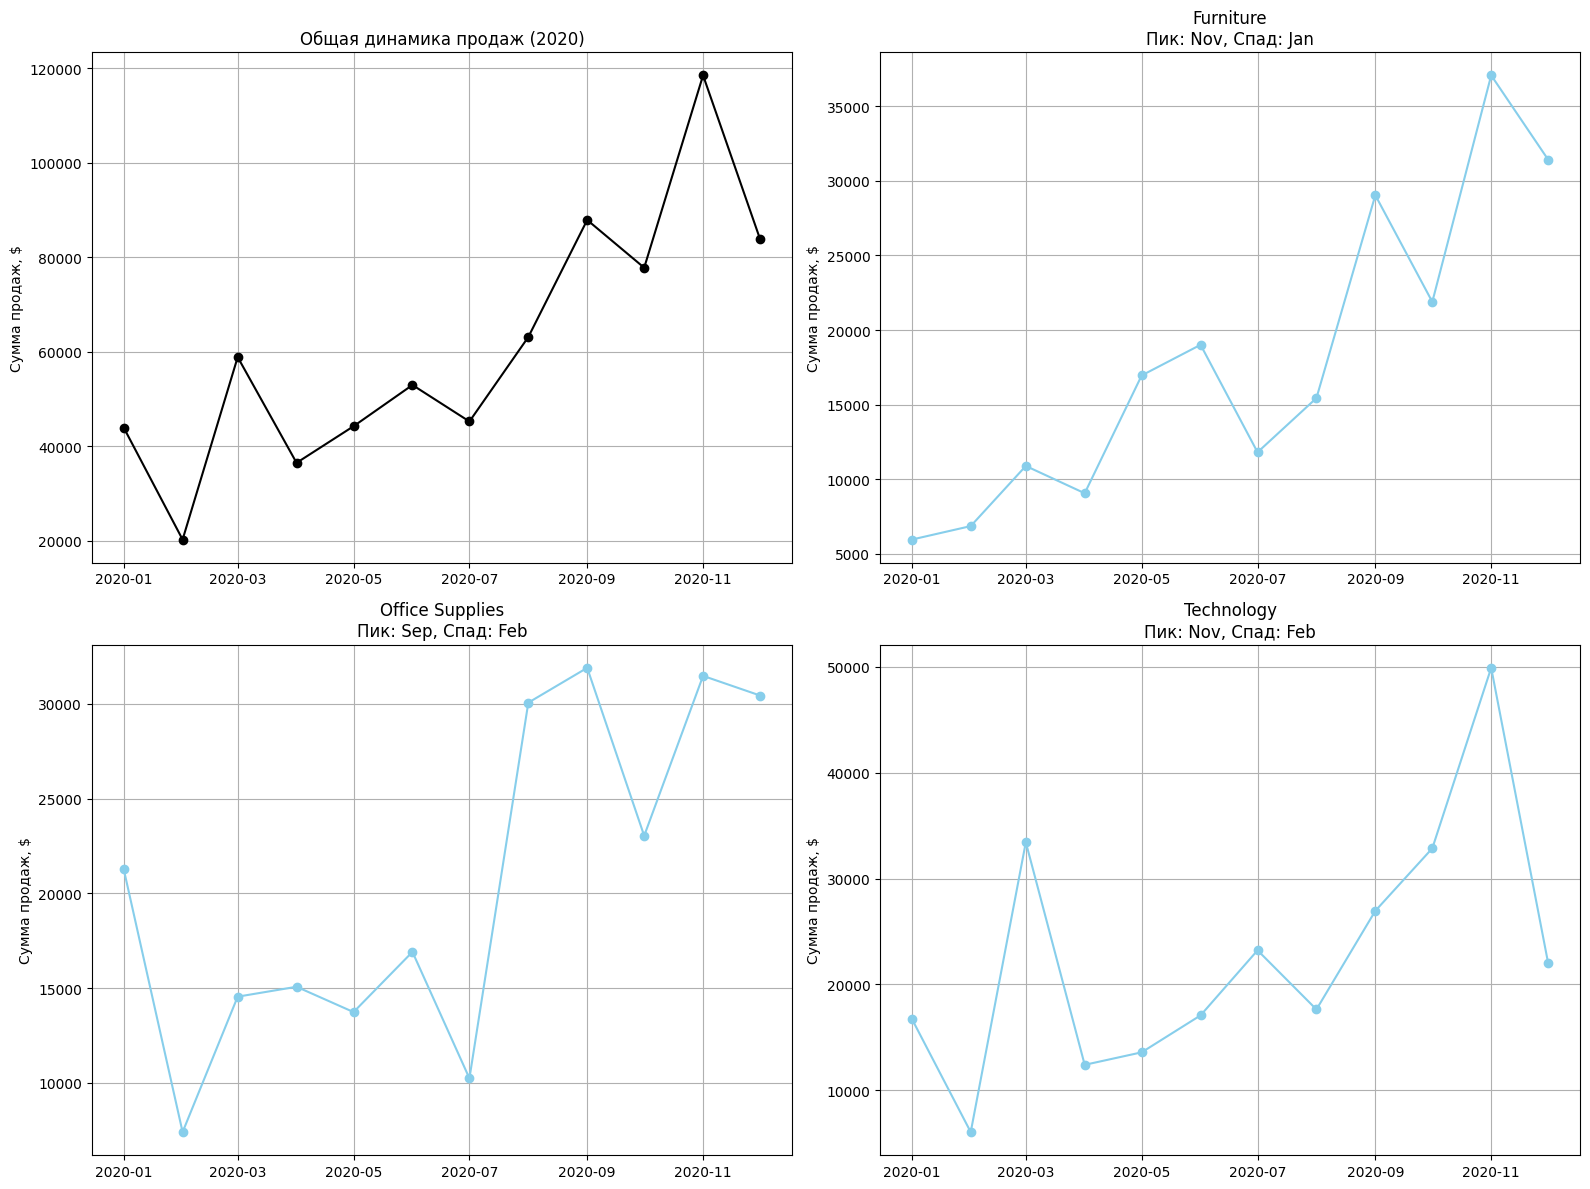


ТОП-3 ПОДКАТЕГОРИИ ПО ВЫРУЧКЕ В КАЖДОЙ КАТЕГОРИИ:

🔹 Furniture:
  - Chairs: $95,554
  - Tables: $60,894
  - Bookcases: $30,024

🔹 Office Supplies:
  - Binders: $72,788
  - Storage: $69,678
  - Appliances: $42,927

🔹 Technology:
  - Phones: $105,341
  - Copiers: $62,899
  - Accessories: $59,946

ВЫВОД ПО ДИНАМИКЕ ПРОДАЖ:
Общий пик продаж: November 2020
Общий спад: February 2020

Категория «Furniture»:
  - Пик: November, Спад: January
  - Ярко выраженная праздничная сезонность (Black Friday + Рождество)

Категория «Office Supplies»:
  - Пик: September, Спад: February
  - Ярко выраженная праздничная сезонность (Black Friday + Рождество)

Категория «Technology»:
  - Пик: November, Спад: February
  - Ярко выраженная праздничная сезонность (Black Friday + Рождество)

📌 Заключение:
- Все категории следуют общей сезонной динамике с пиком в ноябре–декабре.
- Технологии (Phones, Accessories) показывают наибольшую волатильность и рост в декабре.
- Office Supplies и Furniture — более стабильны, н

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка и подготовка данных
df = pd.read_csv('amazon_market_data.csv', header=0)

# Преобразование даты и Sales
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Группировка по месяцам
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# 2. Динамика по категориям
categories = df['Category'].unique()
cat_monthly = {}
for cat in categories:
    cat_data = df[df['Category'] == cat]
    sales = cat_data.groupby('Order Month')['Sales'].sum()
    sales.index = sales.index.to_timestamp()
    cat_monthly[cat] = sales.reindex(monthly_sales.index, fill_value=0)

# 3. Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
color_main = 'black'
color_cat = 'skyblue'

# Общий график
axes[0].plot(monthly_sales.index, monthly_sales.values, marker='o', color=color_main)
axes[0].set_title('Общая динамика продаж (2020)')
axes[0].set_ylabel('Сумма продаж, $')
axes[0].grid(True)

# Графики по категориям
for i, cat in enumerate(categories):
    ax = axes[i + 1]
    sales = cat_monthly[cat]
    ax.plot(sales.index, sales.values, marker='o', color=color_cat)

    # Пик и спад
    if sales.max() > 0:
        peak = sales.idxmax().strftime('%b')
        low = sales.idxmin().strftime('%b')
        ax.set_title(f'{cat}\nПик: {peak}, Спад: {low}')
    else:
        ax.set_title(f'{cat} — продаж нет')

    ax.set_ylabel('Сумма продаж, $')
    ax.grid(True)

# Очистка лишнего графика, если категорий < 3
for j in range(len(categories) + 1, 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 4. Вывод по подкатегориям (топ-3 подкатегории по выручке в каждой категории)
print("\n" + "="*60)
print("ТОП-3 ПОДКАТЕГОРИИ ПО ВЫРУЧКЕ В КАЖДОЙ КАТЕГОРИИ:")
print("="*60)

for cat in categories:
    sub_sales = df[df['Category'] == cat].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(3)
    print(f"\n🔹 {cat}:")
    for sub, val in sub_sales.items():
        print(f"  - {sub}: ${val:,.0f}")

# 5. Текстовый вывод — анализ сезонности
print("\n" + "="*60)
print("ВЫВОД ПО ДИНАМИКЕ ПРОДАЖ:")
print("="*60)

total_peak = monthly_sales.idxmax().strftime('%B')
total_trough = monthly_sales.idxmin().strftime('%B')
print(f"Общий пик продаж: {total_peak} 2020")
print(f"Общий спад: {total_trough} 2020")

for cat in categories:
    sales = cat_monthly[cat]
    if sales.max() > 0:
        cat_peak = sales.idxmax().strftime('%B')
        cat_trough = sales.idxmin().strftime('%B')
        print(f"\nКатегория «{cat}»:")
        print(f"  - Пик: {cat_peak}, Спад: {cat_trough}")

        # Сезонность
        nov_dec = sales.loc['2020-11':'2020-12'].sum()
        jan_feb = sales.loc['2020-01':'2020-02'].sum()
        if nov_dec > jan_feb * 1.5:
            print(f"  - Ярко выраженная праздничная сезонность (Black Friday + Рождество)")
        else:
            print(f"  - Умеренная сезонность")

print("\n📌 Заключение:")
print("- Все категории следуют общей сезонной динамике с пиком в ноябре–декабре.")
print("- Технологии (Phones, Accessories) показывают наибольшую волатильность и рост в декабре.")
print("- Office Supplies и Furniture — более стабильны, но всё равно пик в конце года.")
print("- Спад в январе–феврале наблюдается во всех сегментах без исключения.")

#ВЫВОД


**Сезонность:** Все категории имеют выраженную сезонность, но с разными пиковыми месяцами:

Furniture и Technology — пик в ноябре.

Office Supplies — пик в сентябре.

**Рекордный месяц:** Ноябрь 2020 — абсолютный рекорд по продажам во всех категориях, особенно в Technology.

**Слабые месяцы:** Январь и февраль — самые слабые месяцы для всех категорий, что говорит о необходимости акций и стимуляции спроса в начале года.

**Влияние пандемии 2020:** Вероятно, рост продаж канцелярии в августе–сентябре и техники в октябре–ноябре связан с переходом на удалённую работу и учёбу.

#ОБЩИЙ ВЫВОД


Продажи на Amazon в 2020 году в США демонстрируют чёткую сезонность, категориальную специфику и влияние макрособытий (пандемия).
Успешная стратегия требует дифференцированного подхода к каждой категории и проактивного управления спросом в низкие сезоны.